# Ch09. 주식데이터를 통해 groupby 사용하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 01. 데이터 이동하기(shift)

In [2]:
data = [['01/01', 1000], ['01/02', 1200], ['01/03', 900], ['01/04', 1200], ['01/05', 1500]]
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

,날짜,가격
0,01/01,1000
1,01/02,1200
2,01/03,900
3,01/04,1200
4,01/05,1500


In [3]:
df.shift()

,날짜,가격
0,None,NaN
1,01/01,1000.0
2,01/02,1200.0
3,01/03,900.0
4,01/04,1200.0


In [4]:
df.shift(-1)

,날짜,가격
0,01/02,1200.0
1,01/03,900.0
2,01/04,1200.0
3,01/05,1500.0
4,None,NaN


In [5]:
df1 = df.copy()
df1['가격변동'] = df1['가격'] - df1['가격'].shift()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [6]:
df1['변동률'] = df1['가격'] / df1['가격'].shift() - 1
df1

,날짜,가격,가격변동,변동률
0,01/01,1000,NaN,NaN
1,01/02,1200,200.0,0.200000
2,01/03,900,-300.0,-0.250000
3,01/04,1200,300.0,0.333333
4,01/05,1500,300.0,0.250000


In [7]:
df1['가격'].pct_change()

0         NaN
1    0.200000
2   -0.250000
3    0.333333
4    0.250000
Name: 가격, dtype: float64

In [8]:
df1['가격'].diff()

0      NaN
1    200.0
2   -300.0
3    300.0
4    300.0
Name: 가격, dtype: float64

## 02. groupby가 필요한 이유

* 그룹 내에서 함수를 적용하게 해주는 함수
* 기본 구조
```
df.groupby(그룹의 기준)[함수에 적용할 열].func()
```

## 03. 원시(raw) 데이터 그룹화해서 다르기(groupby)

In [3]:
data1 = [
    ['김판다', 'A', '남', 95],
    ['송중기', 'B', '남', 93],
    ['김나현', 'B', '여', 88],
    ['박효신', 'A', '남', 85],
    ['강승주', 'B', '여', 78],
    ['권보아', 'A', '여', 72]
]
df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df1

,이름,반,성별,점수
0,김판다,A,남,95
1,송중기,B,남,93
2,김나현,B,여,88
3,박효신,A,남,85
4,강승주,B,여,78
5,권보아,A,여,72


In [4]:
data2 = [
    ['2021-01-01', '김판다', 10000],
    ['2021-01-01', '강승주', 2000],
    ['2021-01-02', '김판다', 20000],
    ['2021-01-02', '강승주', 5000],
    ['2021-01-03', '강승주', 8000],
    ['2021-01-03', '김판다', 5000]
]
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df2

,날짜,이름,입금
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [6]:
df = df1.copy()
df['등수'] = df['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수
0,김판다,A,남,95,1.0
1,송중기,B,남,93,2.0
2,김나현,B,여,88,3.0
3,박효신,A,남,85,4.0
4,강승주,B,여,78,5.0
5,권보아,A,여,72,6.0


In [8]:
# 반별 등수
df['반등수'] = df.groupby('반')['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수,반등수
0,김판다,A,남,95,1.0,1.0
1,송중기,B,남,93,2.0,1.0
2,김나현,B,여,88,3.0,2.0
3,박효신,A,남,85,4.0,2.0
4,강승주,B,여,78,5.0,3.0
5,권보아,A,여,72,6.0,3.0


In [9]:
df.groupby('반')['점수'].mean()

반
A    84.000000
B    86.333333
Name: 점수, dtype: float64

In [10]:
df.groupby(['반', '성별'])['점수'].mean()

반  성별
A  남     90.0
   여     72.0
B  남     93.0
   여     83.0
Name: 점수, dtype: float64

In [11]:
df.groupby(['반', '성별'])['점수'].mean().unstack()

성별,남,여
반,,
A,90.0,72.0
B,93.0,83.0


In [12]:
df2

,날짜,이름,입금
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [14]:
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

,날짜,이름,입금,전일입금
0,2021-01-01,김판다,10000,NaN
1,2021-01-01,강승주,2000,NaN
2,2021-01-02,김판다,20000,10000.0
3,2021-01-02,강승주,5000,2000.0
4,2021-01-03,강승주,8000,5000.0
5,2021-01-03,김판다,5000,20000.0


## 04. 파이썬 라이브러리를 통해 주식데이터 가져오기

In [15]:
import yfinance as yf

In [20]:
df = yf.download('005930.KS', '2018-01-01', '2020-12-31')
df.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 738 entries, 2018-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       738 non-null    float64
 1   High       738 non-null    float64
 2   Low        738 non-null    float64
 3   Close      738 non-null    float64
 4   Adj Close  738 non-null    float64
 5   Volume     738 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.4 KB


<Axes: xlabel='Date'>

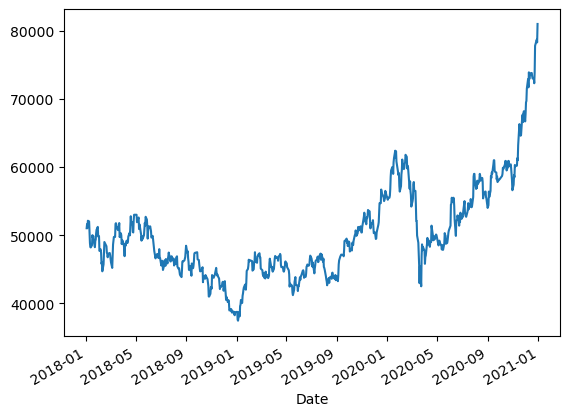

In [21]:
df['Close'].plot()

In [24]:
stocks = ['005930.KS', '035720.KS']
df_ex1 = pd.DataFrame()
for code in stocks:
    df = yf.download(code, '2018-01-01', '2020-12-31')
    df['Code'] = code
    df_ex1 = pd.concat([df_ex1, df])
df_ex1.info()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1476 entries, 2018-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1476 non-null   float64
 1   High       1476 non-null   float64
 2   Low        1476 non-null   float64
 3   Close      1476 non-null   float64
 4   Adj Close  1476 non-null   float64
 5   Volume     1476 non-null   int64  
 6   Code       1476 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 92.2+ KB


In [31]:
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/stock_230227.csv'
df_stocks = pd.read_csv(url)
df_stocks.head()

,종목코드,종목명,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,060310,3S,KOSDAQ,중견기업부,2240,-75,-3.24,2315,2330,2240,382882,873137720,108722078080,48536642
1,095570,AJ네트웍스,KOSPI,NaN,5370,-90,-1.65,5480,5480,5300,445230,2380080900,251435724150,46822295
2,006840,AK홀딩스,KOSPI,NaN,17770,-30,-0.17,17670,17920,17600,10997,195036620,235409158970,13247561
3,054620,APS홀딩스,KOSDAQ,중견기업부,13760,0,0.00,13600,13860,13600,48890,669061890,280624480960,20394221
4,265520,AP시스템,KOSDAQ,우량기업부,20200,-350,-1.70,20700,20750,20100,59548,1213442450,308684704200,15281421


In [32]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    2700 non-null   object 
 1   종목명     2700 non-null   object 
 2   시장구분    2700 non-null   object 
 3   소속부     1757 non-null   object 
 4   종가      2700 non-null   int64  
 5   대비      2700 non-null   int64  
 6   등락률     2700 non-null   float64
 7   시가      2700 non-null   int64  
 8   고가      2700 non-null   int64  
 9   저가      2700 non-null   int64  
 10  거래량     2700 non-null   int64  
 11  거래대금    2700 non-null   int64  
 12  시가총액    2700 non-null   int64  
 13  상장주식수   2700 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 295.4+ KB


In [46]:
df_stocks = df_stocks.loc[df_stocks['시가총액'].rank(ascending=False) <= 100,['종목코드', '종목명']]
df_stocks.head()

,종목코드,종목명
7,282330,BGF리테일
22,097950,CJ제일제당
36,005830,DB손해보험
61,383220,F&F
67,078930,GS


In [52]:
code_list = [code+'.KS' for code in df_stocks.종목코드]
code_list

['282330.KS',
 '097950.KS',
 '005830.KS',
 '383220.KS',
 '078930.KS',
 '267250.KS',
 '028300.KS',
 '011200.KS',
 '105560.KS',
 '030200.KS',
 '033780.KS',
 '003550.KS',
 '034220.KS',
 '051900.KS',
 '373220.KS',
 '032640.KS',
 '011070.KS',
 '066570.KS',
 '051910.KS',
 '035420.KS',
 '005490.KS',
 '010950.KS',
 '034730.KS',
 '011790.KS',
 '302440.KS',
 '326030.KS',
 '402340.KS',
 '361610.KS',
 '096770.KS',
 '017670.KS',
 '000660.KS',
 '035250.KS',
 '010130.KS',
 '011780.KS',
 '000270.KS',
 '024110.KS',
 '251270.KS',
 '003490.KS',
 '241560.KS',
 '034020.KS',
 '004990.KS',
 '011170.KS',
 '088980.KS',
 '138040.KS',
 '008560.KS',
 '006800.KS',
 '006400.KS',
 '028260.KS',
 '207940.KS',
 '032830.KS',
 '018260.KS',
 '028050.KS',
 '009150.KS',
 '005930.KS',
 '005935.KS',
 '010140.KS',
 '029780.KS',
 '000810.KS',
 '068270.KS',
 '091990.KS',
 '055550.KS',
 '002790.KS',
 '090430.KS',
 '086520.KS',
 '247540.KS',
 '036570.KS',
 '066970.KS',
 '271560.KS',
 '316140.KS',
 '000100.KS',
 '139480.KS',
 '0357

In [53]:
df_ex1 = pd.DataFrame()
for code in code_list:
    try:
        df = yf.download(code, '2018-01-01', '2020-12-31')
    except:
        print(f'download faile, code : {code}')
        continue
    df['code'] = code
    df_ex1 = pd.concat([df_ex1, df])
df_ex1.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['383220.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['028300.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['373220.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['302440.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['402340.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['361610.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['008560.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['091990.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['086520.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['247540.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['066970.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['293490.KS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['323410.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['377300.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['259960.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['329180.KS']: Exception("%ticker%: Data doesn't exist for startDate = 1514732400, endDate = 1609340400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,028300
Date,,,,,,,
2018-01-02,212500.0,212500.0,208500.0,210500.0,192979.812500,43076.0,282330.KS
2018-01-03,205500.0,208500.0,201500.0,202500.0,185645.671875,39089.0,282330.KS
2018-01-04,203000.0,203500.0,200500.0,200500.0,183812.156250,49743.0,282330.KS
2018-01-05,202500.0,202500.0,196500.0,200000.0,183353.750000,29452.0,282330.KS
2018-01-08,200000.0,201000.0,199000.0,199000.0,182436.968750,26055.0,282330.KS


## 05. 2일 연속 급상승 주식 필터링하기

## 06. 시리즈와 데이터프레임의 연산(브로드 캐스팅)

## 07. 신규 상장 주식의 주가 변동 추이 알아보기